<a href="https://colab.research.google.com/github/harshitajain08/CNN/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kaggle

In [5]:
#Configuring the path of kaggle json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing face mask dataset

In [6]:
#API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 83% 136M/163M [00:00<00:00, 306MB/s]
100% 163M/163M [00:00<00:00, 269MB/s]


In [7]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The Dataset is extracted")

The Dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  sample_data


Importing the Dependencies

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files)

['with_mask_1711.jpg', 'with_mask_1590.jpg', 'with_mask_1102.jpg', 'with_mask_1.jpg', 'with_mask_583.jpg', 'with_mask_18.jpg', 'with_mask_811.jpg', 'with_mask_570.jpg', 'with_mask_2154.jpg', 'with_mask_642.jpg', 'with_mask_2732.jpg', 'with_mask_834.jpg', 'with_mask_3193.jpg', 'with_mask_860.jpg', 'with_mask_3404.jpg', 'with_mask_389.jpg', 'with_mask_262.jpg', 'with_mask_1745.jpg', 'with_mask_1032.jpg', 'with_mask_475.jpg', 'with_mask_2031.jpg', 'with_mask_2374.jpg', 'with_mask_1554.jpg', 'with_mask_24.jpg', 'with_mask_2543.jpg', 'with_mask_2796.jpg', 'with_mask_1965.jpg', 'with_mask_2755.jpg', 'with_mask_1148.jpg', 'with_mask_943.jpg', 'with_mask_1649.jpg', 'with_mask_1397.jpg', 'with_mask_1712.jpg', 'with_mask_3051.jpg', 'with_mask_2940.jpg', 'with_mask_753.jpg', 'with_mask_3087.jpg', 'with_mask_781.jpg', 'with_mask_385.jpg', 'with_mask_3145.jpg', 'with_mask_3633.jpg', 'with_mask_249.jpg', 'with_mask_1600.jpg', 'with_mask_2098.jpg', 'with_mask_1457.jpg', 'with_mask_1215.jpg', 'with_ma

In [11]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files)

['without_mask_616.jpg', 'without_mask_3298.jpg', 'without_mask_2667.jpg', 'without_mask_3657.jpg', 'without_mask_943.jpg', 'without_mask_1824.jpg', 'without_mask_1949.jpg', 'without_mask_2446.jpg', 'without_mask_1050.jpg', 'without_mask_2999.jpg', 'without_mask_2627.jpg', 'without_mask_1281.jpg', 'without_mask_3444.jpg', 'without_mask_3326.jpg', 'without_mask_3673.jpg', 'without_mask_1063.jpg', 'without_mask_3158.jpg', 'without_mask_1291.jpg', 'without_mask_87.jpg', 'without_mask_3323.jpg', 'without_mask_1389.jpg', 'without_mask_896.jpg', 'without_mask_1107.jpg', 'without_mask_745.jpg', 'without_mask_1699.jpg', 'without_mask_820.jpg', 'without_mask_1630.jpg', 'without_mask_2637.jpg', 'without_mask_2734.jpg', 'without_mask_852.jpg', 'without_mask_234.jpg', 'without_mask_604.jpg', 'without_mask_1426.jpg', 'without_mask_68.jpg', 'without_mask_1982.jpg', 'without_mask_1536.jpg', 'without_mask_106.jpg', 'without_mask_797.jpg', 'without_mask_72.jpg', 'without_mask_3255.jpg', 'without_mask_6

In [12]:
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images 3828


Creating Labels for the two class of images

In [13]:
#creating labels
with_mask_labels= [1]*3725
without_mask_labels= [0]*3828

In [14]:
print(with_mask_labels)
print(without_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [15]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


Displaying the images

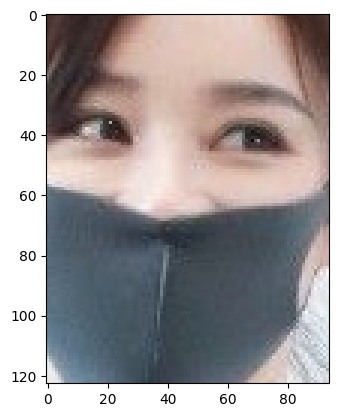

In [16]:
#displaying with mask images
img = mpimg.imread("/content/data/with_mask/with_mask_1485.jpg")
imgplot = plt.imshow(img)
plt.show()

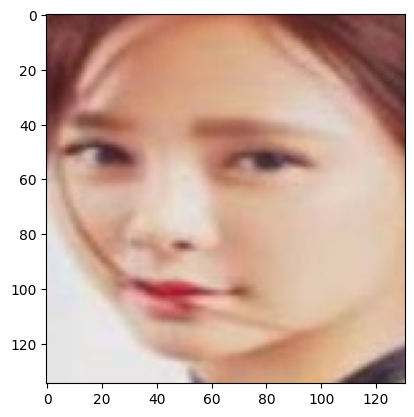

In [17]:
#displaying without mask images
img = mpimg.imread("/content/data/without_mask/without_mask_3191.jpg")
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [18]:
#Convert images to numpy arrays
with_mask_path = "/content/data/with_mask/"
data =[]
for img_file in with_mask_files:
  image= Image.open(with_mask_path + img_file)
  image= image.resize((128,128))    #(height, width)
  image= image.convert("RGB")
  image= np.array(image)
  data.append(image)


without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_files:
  image= Image.open(without_mask_path + img_file)
  image= image.resize((128,128))    #(height, width)
  image= image.convert("RGB")
  image= np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

array([[[128, 124, 115],
        [127, 123, 114],
        [124, 120, 111],
        ...,
        [117, 117, 109],
        [120, 118, 109],
        [123, 119, 110]],

       [[128, 124, 115],
        [126, 122, 113],
        [123, 119, 110],
        ...,
        [117, 117, 109],
        [119, 117, 109],
        [122, 118, 109]],

       [[127, 123, 114],
        [126, 122, 113],
        [123, 119, 110],
        ...,
        [117, 117, 109],
        [119, 117, 109],
        [121, 117, 108]],

       ...,

       [[112, 111, 107],
        [112, 111, 107],
        [110, 109, 105],
        ...,
        [111, 110, 106],
        [112, 112, 107],
        [111, 112, 107]],

       [[114, 110, 107],
        [113, 111, 106],
        [113, 111, 107],
        ...,
        [110, 109, 105],
        [111, 111, 106],
        [111, 111, 106]],

       [[115, 110, 105],
        [116, 112, 106],
        [118, 115, 110],
        ...,
        [109, 108, 104],
        [110, 109, 105],
        [110, 109, 105]]], dtype=uint8)
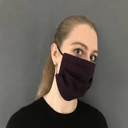

In [ ]:
data[0]

In [19]:
#Converting image list and label list to numpy arrays
x=np.array(data)
y=np.array(labels)
print(x)
print(y)

[[[[ 65  65  67]
   [ 62  62  64]
   [ 60  60  62]
   ...
   [ 13  13  13]
   [ 13  13  13]
   [ 13  13  13]]

  [[ 64  64  66]
   [ 61  61  63]
   [ 58  58  60]
   ...
   [ 13  13  13]
   [ 13  13  13]
   [ 13  13  13]]

  [[ 61  61  63]
   [ 58  58  60]
   [ 55  55  57]
   ...
   [ 13  13  13]
   [ 13  13  13]
   [ 14  14  14]]

  ...

  [[197 162 147]
   [177 145 131]
   [147 118 105]
   ...
   [ 97  87  73]
   [105  95  80]
   [119 109  94]]

  [[207 170 154]
   [196 162 147]
   [171 140 127]
   ...
   [102  90  76]
   [113 101  87]
   [131 119 105]]

  [[203 167 151]
   [200 166 151]
   [185 154 140]
   ...
   [102  90  76]
   [115 103  89]
   [136 124 110]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [254 254 253]
   [252 253 249]
   [251 252 246]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [228 228 229]
   [249 250 247]
   [253 253 248]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [189 188 191]
   [244 245 244]
   [255 255

Train  Test Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2)

In [21]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

Building a Convolutional Neural Network (CNN)

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes = 2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation="sigmoid"))

In [24]:
#Compile the neural network
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

In [25]:
#Training the neural network
history=model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
160/160 [==============================] - 10s 23ms/step - loss: 0.5425 - acc: 0.7489 - val_loss: 0.3067 - val_acc: 0.8748
Epoch 2/5
160/160 [==============================] - 3s 19ms/step - loss: 0.3274 - acc: 0.8744 - val_loss: 0.2418 - val_acc: 0.9101
Epoch 3/5
160/160 [==============================] - 3s 18ms/step - loss: 0.2725 - acc: 0.8933 - val_loss: 0.2282 - val_acc: 0.9295
Epoch 4/5
160/160 [==============================] - 3s 17ms/step - loss: 0.2268 - acc: 0.9125 - val_loss: 0.2211 - val_acc: 0.9242
Epoch 5/5
160/160 [==============================] - 3s 17ms/step - loss: 0.1887 - acc: 0.9294 - val_loss: 0.2025 - val_acc: 0.9312


Model Evaluation

In [28]:
loss, accuracy= model.evaluate(x_test_scaled, y_test)
print("Test Accuracy=", accuracy)

60/60 [==============================] - 0s 8ms/step - loss: 0.1678 - acc: 0.9307
Test Accuracy= 0.9306511282920837


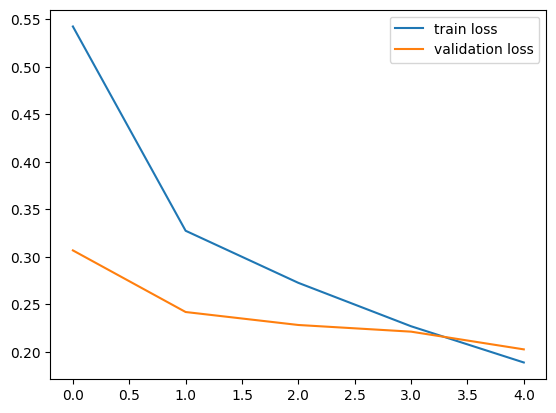

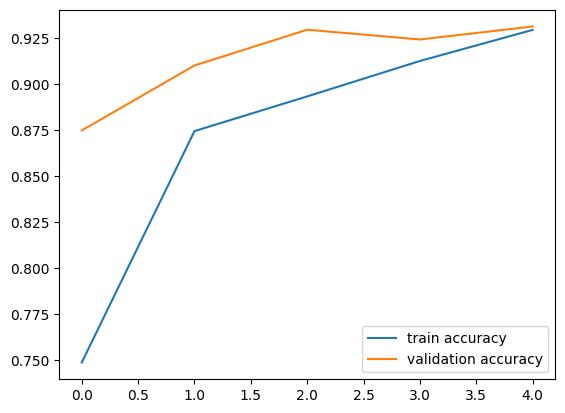

In [29]:
h= history
#plot the loss value
plt.plot(h.history["loss"], label="train loss")
plt.plot(h.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history["acc"], label="train accuracy")
plt.plot(h.history["val_acc"], label="validation accuracy")
plt.legend()
plt.show()

Predictive System

In [1]:
input_image_path = input("Path of image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print("The person is wearing a mask")
else:
  print("The person is not wearing a mask")

Path of image to be predicted: /content/d1b29aff-b4be-41da-bd05-e9c5e50787da-Roger_Brown_photo.webp


NameError: name 'cv2' is not defined